# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FL neut myeloid

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/fetal_liver_alladata_Copy1.h5ad')

In [4]:
adata.raw = adata

In [5]:
adata.obs["tissue"] = "liver"

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
B cell                            1079
DC1                                336
DC2                               3954
DC precursor                       330
Early Erythroid                  11985
Early lymphoid_T lymphocyte        767
Endothelial cell                  3348
Fibroblast                        1713
HSC_MPP                           3439
Hepatocyte                        2479
ILC precursor                     1726
Kupffer Cell                     24841
Late Erythroid                    3180
MEMP                              1342
Mast cell                         1308
Megakaryocyte                     3983
Mid Erythroid                    27000
Mono-Mac                          6590
Monocyte                          2586
Monocyte precursor                 350
NK                                6706
Neutrophil-myeloid progenitor      658
Pre pro B cell                     234
VCAM1+ EI macrophage               161
pDC precursor                      253
pre-B cell   

In [7]:
adata = adata[adata.obs['cell.labels'].isin(['Neutrophil-myeloid progenitor'])].copy()

In [8]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
Neutrophil-myeloid progenitor    658
dtype: int64

In [9]:
adata.obs["tissue"] = "liver"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [10]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
liver_Neutrophil-myeloid progenitor    658
dtype: int64

In [11]:
liver = adata

# Load FBM neut myeloid

In [12]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200414.h5ad')

In [13]:
adata.raw = adata

In [14]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T                        327
CD8 T                        171
CD14 monocyte               8787
CD56 bright NK               540
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
EI macrophage                 92
ELP                         1358
GMP                         1285
HSC                           92
ILC precursor                 67
Immature B cell             1998
MEMP                          16
MEP                          269
MK                          1036
MPP lymphoid                  34
MPP myeloid 1                 46
MPP myeloid 2                 46
NKT                          137
Naive B cell                1423
Pre B progenitor           14234
Pre pro B progenitor        5428
Pro B progenitor            5530
Treg                          62
adipo-CAR                    359
arteriolar fibroblast         84
basophil                     13

In [15]:
adata.obs["tissue"] = "fbm"

In [16]:
adata = adata[adata.obs['cell.labels'].isin(['neut myeloid'])].copy()

In [17]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
neut myeloid    4184
dtype: int64

In [18]:
adata.obs["tissue"] = "fbm"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [19]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
fbm_neut myeloid    4184
dtype: int64

In [20]:
fbm = adata

# Merge the neut myeloid datasets

In [21]:
merged = liver.concatenate(fbm, index_unique=None, join='outer')

In [22]:
merged.shape

(4842, 33713)

In [23]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
cell_numbers = merged.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
fbm_neut myeloid                       4184
liver_Neutrophil-myeloid progenitor     658
dtype: int64

In [24]:
merged

AnnData object with n_obs × n_vars = 4842 × 33713 
    obs: 'AnnatomicalPart', 'april_cell.labels', 'batch', 'cell.labels', 'cell.labels_progen', 'combined.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'n_counts', 'orig.ident', 'percent.mito', 'processing.type', 'sample', 'sample.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'stages', 'tissue', 'tissue_cell.labels'
    var: 'gene_ids-1-1', 'feature_types-1-1'
    obsm: 'X_umap'

# Pre-process the datasets (no dimensional reduction)

In [25]:
adata = merged

In [26]:
adata.shape

(4842, 33713)

In [27]:
adata.X

<4842x33713 sparse matrix of type '<class 'numpy.float32'>'
	with 11968638 stored elements in Compressed Sparse Row format>

In [28]:
adata.X = np.nan_to_num(adata.X, copy=False)

In [29]:
adata.X

<4842x33713 sparse matrix of type '<class 'numpy.float32'>'
	with 11968638 stored elements in Compressed Sparse Row format>

In [30]:
# normalise count data 
sc.pp.normalize_total(adata)

In [31]:
# log the count data 
sc.pp.log1p(adata)

In [32]:
adata

AnnData object with n_obs × n_vars = 4842 × 33713 
    obs: 'AnnatomicalPart', 'april_cell.labels', 'batch', 'cell.labels', 'cell.labels_progen', 'combined.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'n_counts', 'orig.ident', 'percent.mito', 'processing.type', 'sample', 'sample.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'stages', 'tissue', 'tissue_cell.labels'
    var: 'gene_ids-1-1', 'feature_types-1-1'
    obsm: 'X_umap'

In [33]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [34]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [35]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Save the raw GEX for SPIB/CEBPA along with tissue and sample

In [36]:
metadata_df = pd.DataFrame(adata.obs[["tissue_cell.labels", "orig.ident"]])
metadata_df

,tissue_cell.labels,orig.ident
index,,
F41_liver_CD45-_FCAImmP7555847_CGTCACTAGACAGGCT,liver_Neutrophil-myeloid progenitor,F41
F23_liver_CD45-_FCAImmP7198631_CTGTGCTGTCCGAAGA,liver_Neutrophil-myeloid progenitor,F23
F30_liver_CD45+_FCAImmP7277560_GGTGAAGGTGGTACAG,liver_Neutrophil-myeloid progenitor,F30
F32_liver_CD45+_FCAImmP7316894_CGGAGTCTCGTAGGTT,liver_Neutrophil-myeloid progenitor,F32
F32_liver_CD45+_FCAImmP7316894_GCCAAATGTCAGATAA,liver_Neutrophil-myeloid progenitor,F32
F32_liver_CD45+_FCAImmP7316894_GGGATGATCAGCTCTC,liver_Neutrophil-myeloid progenitor,F32
F34_liver_CD45-_FCAImmP7352194_TGCCAAAGTTCACCTC,liver_Neutrophil-myeloid progenitor,F34
F17_liver_Total_4834STDY7002882_AGCATACGTCTGCGGT,liver_Neutrophil-myeloid progenitor,F17
F17_liver_CD45-_4834STDY7038751_ACACCAATCACCACCT,liver_Neutrophil-myeloid progenitor,F17


In [37]:
gex_df = pd.DataFrame(data=adata.X, index=adata.obs.index, columns=adata.var.index)
gex_df = gex_df[['SPIB','CEBPA']]
gex_df

,SPIB,CEBPA
index,,
F41_liver_CD45-_FCAImmP7555847_CGTCACTAGACAGGCT,0.000000,0.000000
F23_liver_CD45-_FCAImmP7198631_CTGTGCTGTCCGAAGA,0.000000,0.000000
F30_liver_CD45+_FCAImmP7277560_GGTGAAGGTGGTACAG,0.000000,0.000000
F32_liver_CD45+_FCAImmP7316894_CGGAGTCTCGTAGGTT,0.000000,0.000000
F32_liver_CD45+_FCAImmP7316894_GCCAAATGTCAGATAA,0.000000,0.000000
F32_liver_CD45+_FCAImmP7316894_GGGATGATCAGCTCTC,0.000000,0.000000
F34_liver_CD45-_FCAImmP7352194_TGCCAAAGTTCACCTC,0.000000,0.794081
F17_liver_Total_4834STDY7002882_AGCATACGTCTGCGGT,0.000000,0.000000
F17_liver_CD45-_4834STDY7038751_ACACCAATCACCACCT,0.000000,0.000000


In [38]:
merged_df = gex_df.merge(metadata_df, left_index=True, right_index=True)
merged_df.to_csv('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/neut_myeloid_spib_cebpa_expression_fl_fbm_20200615.csv')
merged_df

,SPIB,CEBPA,tissue_cell.labels,orig.ident
index,,,,
F41_liver_CD45-_FCAImmP7555847_CGTCACTAGACAGGCT,0.000000,0.000000,liver_Neutrophil-myeloid progenitor,F41
F23_liver_CD45-_FCAImmP7198631_CTGTGCTGTCCGAAGA,0.000000,0.000000,liver_Neutrophil-myeloid progenitor,F23
F30_liver_CD45+_FCAImmP7277560_GGTGAAGGTGGTACAG,0.000000,0.000000,liver_Neutrophil-myeloid progenitor,F30
F32_liver_CD45+_FCAImmP7316894_CGGAGTCTCGTAGGTT,0.000000,0.000000,liver_Neutrophil-myeloid progenitor,F32
F32_liver_CD45+_FCAImmP7316894_GCCAAATGTCAGATAA,0.000000,0.000000,liver_Neutrophil-myeloid progenitor,F32
F32_liver_CD45+_FCAImmP7316894_GGGATGATCAGCTCTC,0.000000,0.000000,liver_Neutrophil-myeloid progenitor,F32
F34_liver_CD45-_FCAImmP7352194_TGCCAAAGTTCACCTC,0.000000,0.794081,liver_Neutrophil-myeloid progenitor,F34
F17_liver_Total_4834STDY7002882_AGCATACGTCTGCGGT,0.000000,0.000000,liver_Neutrophil-myeloid progenitor,F17
F17_liver_CD45-_4834STDY7038751_ACACCAATCACCACCT,0.000000,0.000000,liver_Neutrophil-myeloid progenitor,F17


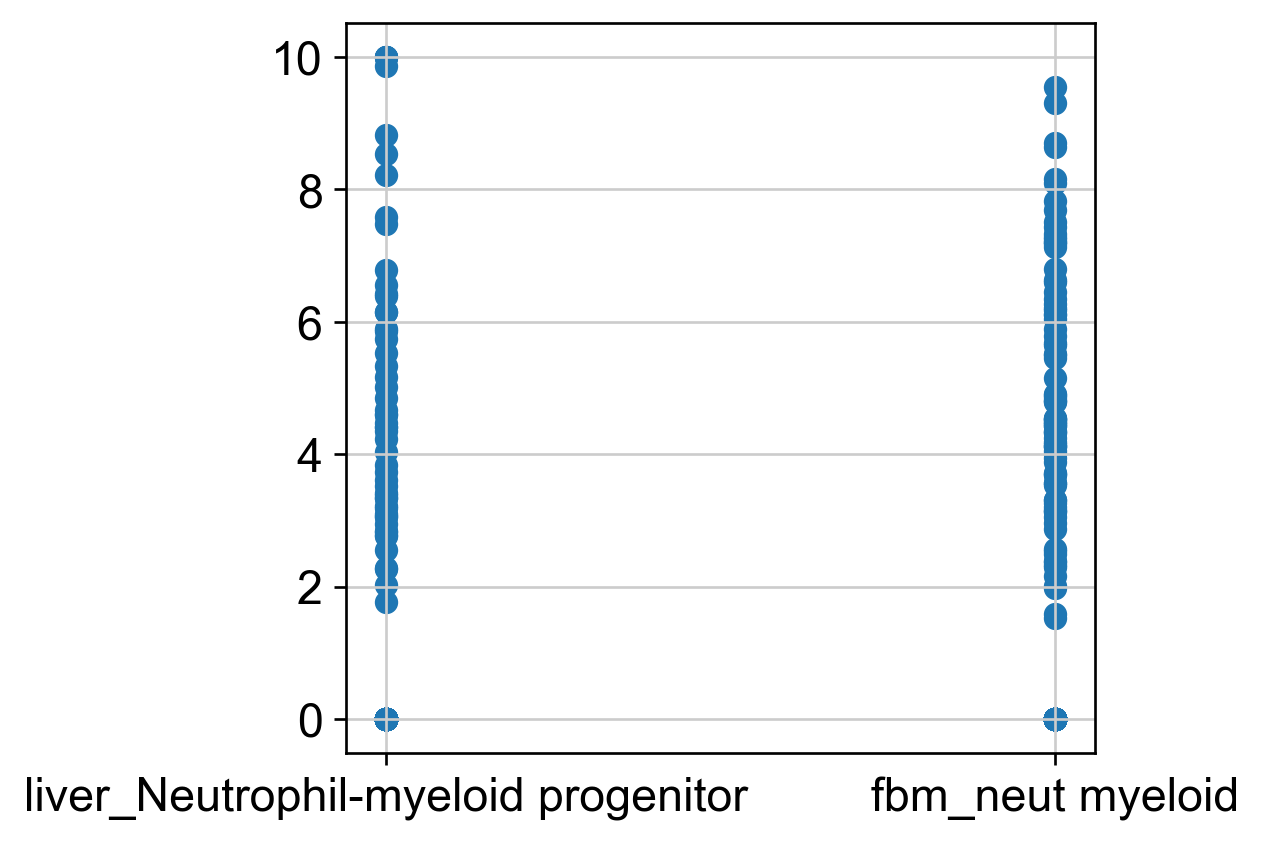

In [39]:
plt.scatter(merged_df["tissue_cell.labels"] ,merged_df["SPIB"])

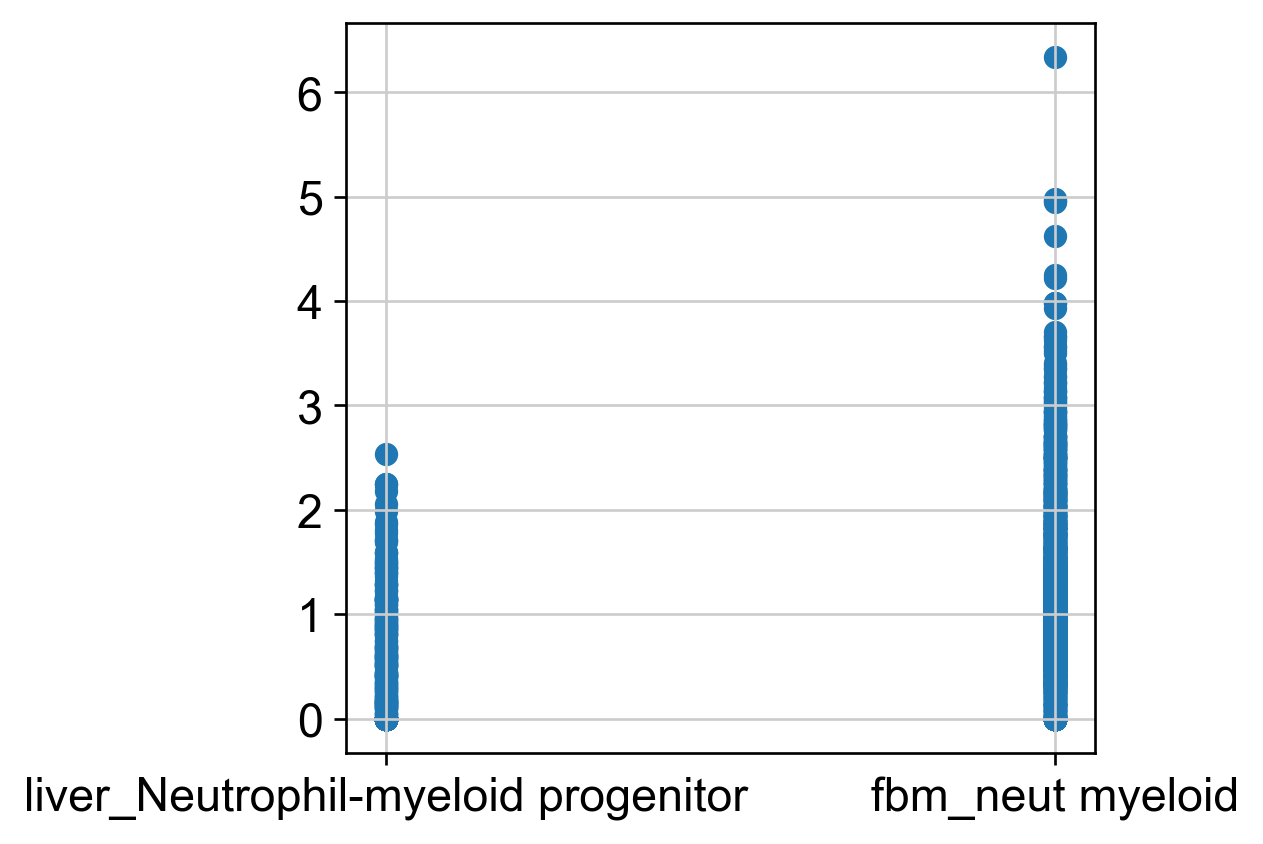

In [40]:
plt.scatter(merged_df["tissue_cell.labels"] ,merged_df["CEBPA"])